In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import cross_val_score
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Regression 
# Dataset - Airbnb listings (almost 49k). 
# 1) Data preprocessing, 
# 2) Exploratory data analysis, 
# 3) Feature engineering, 
# 4) Predicting Price based on independant features, 
# 5) Evaluating the best performing model based on numerous metrics

In [3]:
# Importing dataset
data = pd.read_csv("AB_NYC_2019.csv")

In [6]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# DATA PREPROCESSING

In [4]:
print("Shape of the dataset:", data.shape)
data.head()

Shape of the dataset: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
data1 = data
datanan = data.isna().sum().to_frame(name="count").reset_index()
datanan["Percentage"] = (datanan["count"]/data.shape[0])
datanan

,index,count,Percentage
0,id,0,0.000000
1,name,16,0.000327
2,host_id,0,0.000000
3,host_name,21,0.000429
4,neighbourhood_group,0,0.000000
5,neighbourhood,0,0.000000
6,latitude,0,0.000000
7,longitude,0,0.000000
8,room_type,0,0.000000
9,price,0,0.000000


In [8]:
data["last_review"].fillna("Unknown", inplace=True)
data["name"].fillna("None", inplace=True)
data["host_name"].fillna("Unknown", inplace=True)
data["reviews_per_month"].fillna(data["reviews_per_month"].mode()[0], inplace=True)

In [9]:
print("Rows with 0 in price column: {}".format(len(data[data["price"] == 0])))
data = data.loc[~(data["price"] == 0)] # Dropping them
data.head()

Rows with 0 in price column: 11


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Unknown,0.02,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
data.isna().sum().to_frame().reset_index()

,index,0
0,id,0
1,name,0
2,host_id,0
3,host_name,0
4,neighbourhood_group,0
5,neighbourhood,0
6,latitude,0
7,longitude,0
8,room_type,0
9,price,0


In [11]:
print("The number of duplicated rows: ",data.duplicated().sum(),"\n")
for i in data.columns:
    if len(data[i].unique()) > 15 :
        print("{} no. of unique: {}".format(i,len(data[i].unique())))
    else:
        print("{} no. of unique {} + unique values: {}".format(i,len(data[i].unique()), data[i].unique()))

The number of duplicated rows:  0 

id no. of unique: 48884
name no. of unique: 47895
host_id no. of unique: 37455
host_name no. of unique: 11451
neighbourhood_group no. of unique 5 + unique values: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
neighbourhood no. of unique: 221
latitude no. of unique: 19046
longitude no. of unique: 14715
room_type no. of unique 3 + unique values: ['Private room' 'Entire home/apt' 'Shared room']
price no. of unique: 673
minimum_nights no. of unique: 109
number_of_reviews no. of unique: 394
last_review no. of unique: 1765
reviews_per_month no. of unique: 937
calculated_host_listings_count no. of unique: 47
availability_365 no. of unique: 366


In [12]:
data = data.drop(columns="id")

# EXPLORATORY DATA ANALYSIS

In [40]:
grouped = data.groupby(["neighbourhood_group","room_type"]).agg(price_mean=("price","mean"),price_sum=("price","sum"),price_min=("price","min"),price_max=("price","max"),reviews_mean=("number_of_reviews","mean")).reset_index().sort_values(by="price_mean",ascending=False)
grouped

,neighbourhood_group,room_type,price_mean,price_sum,price_min,price_max,reviews_mean
6,Manhattan,Entire home/apt,249.239109,3289707,0,10000,17.815516
3,Brooklyn,Entire home/apt,178.327545,1704633,0,10000,27.945183
12,Staten Island,Entire home/apt,173.846591,30597,48,5000,33.278409
9,Queens,Entire home/apt,147.050573,308218,10,2600,28.933206
0,Bronx,Entire home/apt,127.506596,48325,28,1000,30.678100
7,Manhattan,Private room,116.776622,932111,10,9999,26.202706
8,Manhattan,Shared room,88.977083,42709,10,1000,21.400000
4,Brooklyn,Private room,76.500099,775099,0,7500,21.086952
10,Queens,Private room,71.762456,241983,10,10000,27.746441
11,Queens,Shared room,69.020202,13666,11,1800,13.863636


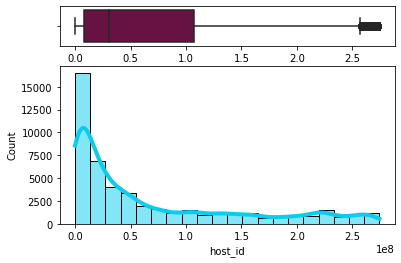

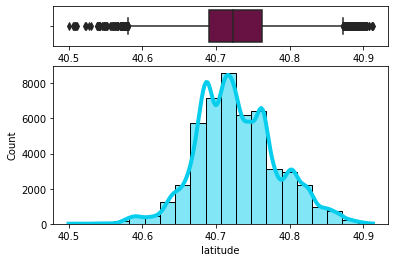

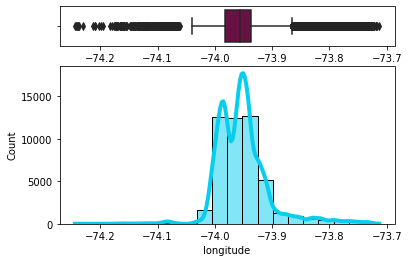

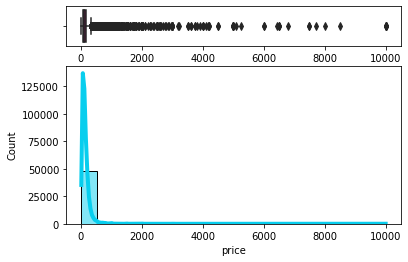

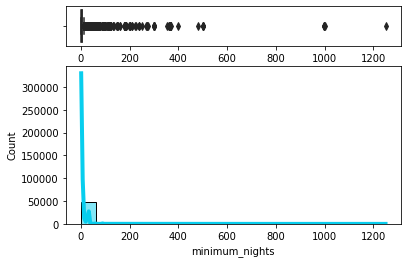

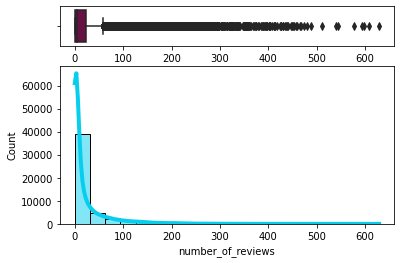

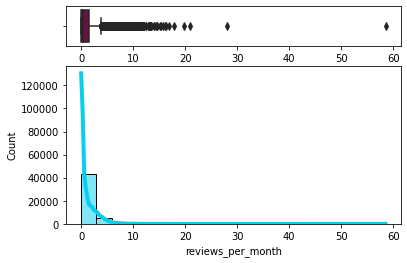

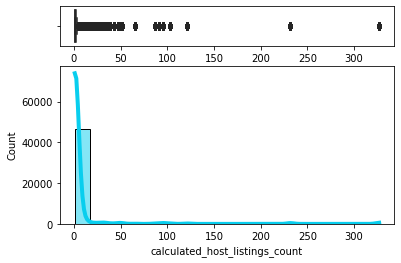

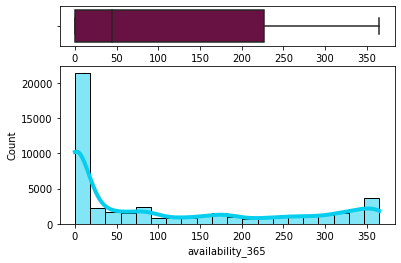

In [14]:
for i in data.select_dtypes(include="number").columns:
    fig,(ax1,ax2) = plt.subplots(2, gridspec_kw={"height_ratios": (.2, .8)})
    sns.boxplot(x=i,data=data, color="#760445", ax=ax1)
    sns.histplot(x=i,data=data, kde=True, color="#08CEEE", line_kws={"lw":4}, bins=20, ax=ax2)
    plt.show()

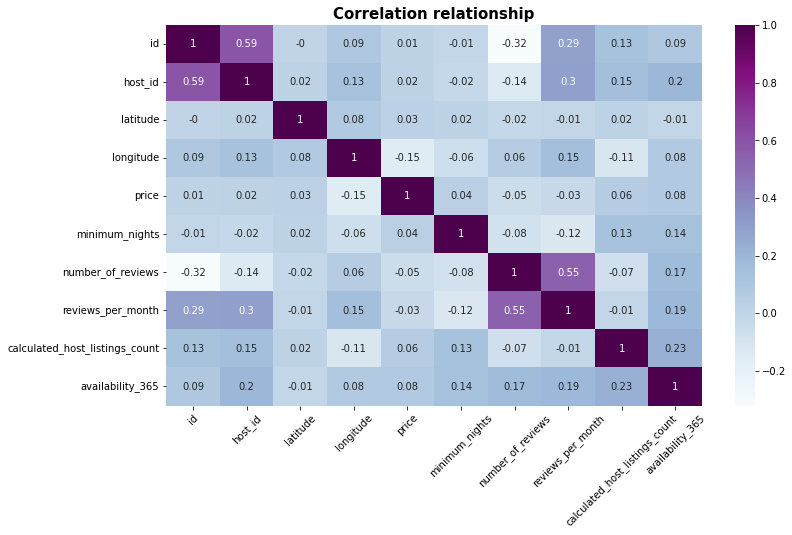

Correlations with price
                             index     price
0                              id  0.010619
1                         host_id  0.015309
2                        latitude  0.033939
3                       longitude -0.150019
4                           price  1.000000
5                  minimum_nights  0.042799
6               number_of_reviews -0.047954
7               reviews_per_month -0.030608
8  calculated_host_listings_count  0.057472
9                availability_365  0.081829 
 Practically nothing correlates with our predicted feature - price, we will try to build predictions anyway to see whether we get at least close to the original price.


In [39]:
plt.figure(figsize=(12,7))
sns.heatmap(round(data.corr(),2), annot=True, cmap="BuPu")
plt.title("Correlation relationship", fontsize=15, fontweight="bold")
plt.xticks(rotation=45)
plt.show()
print("Correlations with price\n",data.corr()["price"].to_frame().reset_index(),"\n","Practically nothing correlates with our predicted feature - price, we will try to build predictions anyway to see whether we get at least close to the original price.")

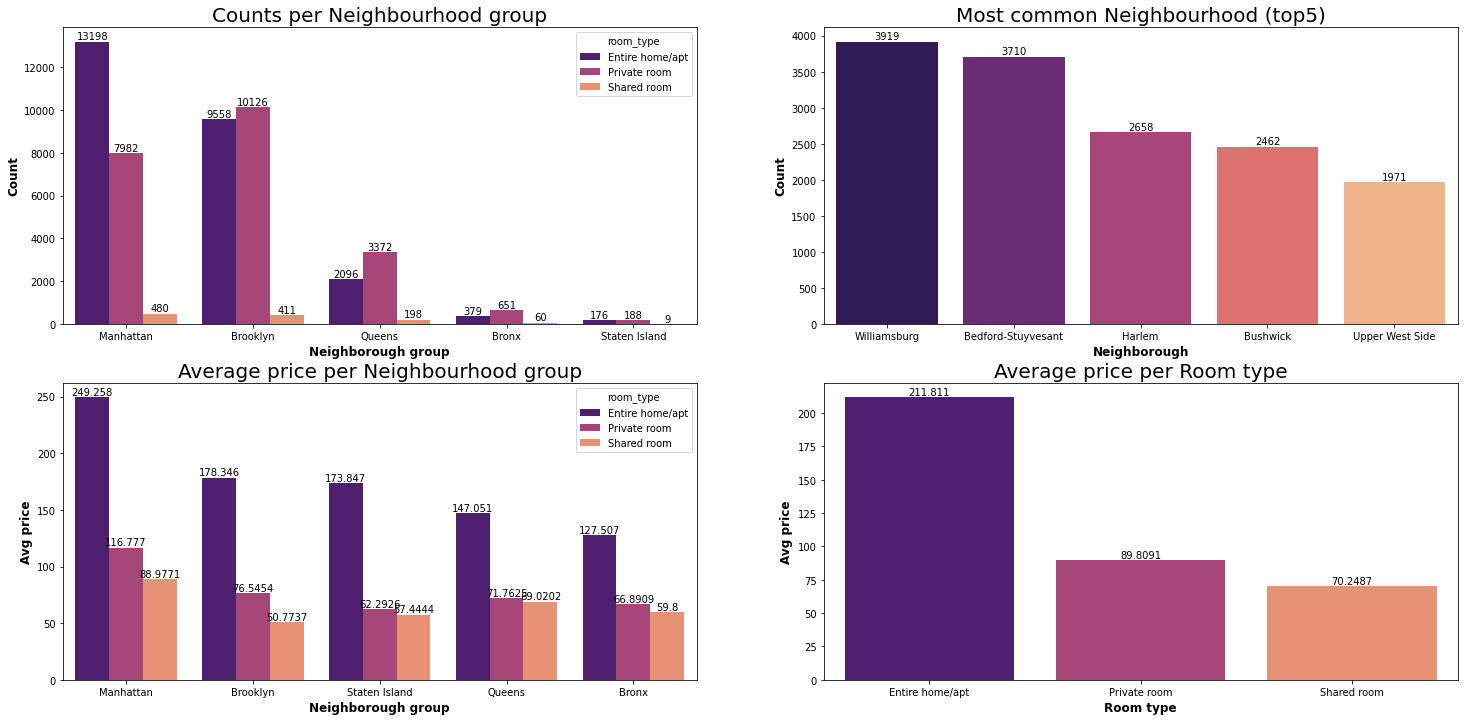

In [16]:
fig, ax = plt.subplots(2,2,figsize=(25,12))
sns.barplot(x="neighbourhood_group", y="price", data=data.groupby(["neighbourhood_group","room_type"]).agg({"price":"count"}).sort_values(by="price",ascending=False).reset_index(), ci=False, palette="magma", ax=ax[0,0],hue="room_type")
sns.barplot(x="neighbourhood", y="price", data=data.groupby(["neighbourhood"]).agg({"price":"count"}).sort_values(by="price",ascending=False).reset_index().head(), ci=False, palette="magma", ax=ax[0,1])
sns.barplot(x="neighbourhood_group", y="price", data=data.groupby(["neighbourhood_group","room_type"]).agg({"price":"mean"}).sort_values(by="price",ascending=False).reset_index(), ci=False, palette="magma", ax=ax[1,0],hue="room_type")
sns.barplot(x="room_type", y="price", data=data.groupby("room_type").agg({"price":"mean"}).sort_values(by="price",ascending=False).reset_index().head(5), ci=False, palette="magma",ax=ax[1,1])
ax[0,0].bar_label(ax[0,0].containers[0])
ax[0,0].bar_label(ax[0,0].containers[1])
ax[0,0].bar_label(ax[0,0].containers[2])
ax[0,1].bar_label(ax[0,1].containers[0])
ax[1,0].bar_label(ax[1,0].containers[0])
ax[1,0].bar_label(ax[1,0].containers[1])
ax[1,0].bar_label(ax[1,0].containers[2])
ax[1,1].bar_label(ax[1,1].containers[0])
ax[0,0].set_xlabel("Neighborough group",fontsize=12,fontweight="bold")
ax[0,0].set_ylabel("Count",fontsize=12,fontweight="bold")
ax[0,1].set_xlabel("Neighborough",fontsize=12,fontweight="bold")
ax[0,1].set_ylabel("Count",fontsize=12,fontweight="bold")
ax[1,0].set_xlabel("Neighborough group",fontsize=12,fontweight="bold")
ax[1,0].set_ylabel("Avg price",fontsize=12,fontweight="bold")
ax[1,1].set_xlabel("Room type",fontsize=12,fontweight="bold")
ax[1,1].set_ylabel("Avg price",fontsize=12,fontweight="bold")
ax[0,0].set_title("Counts per Neighbourhood group",size=20)
ax[0,1].set_title("Most common Neighbourhood (top5)",size=20)
ax[1,0].set_title("Average price per Neighbourhood group",size=20)
ax[1,1].set_title("Average price per Room type",size=20)
plt.show()

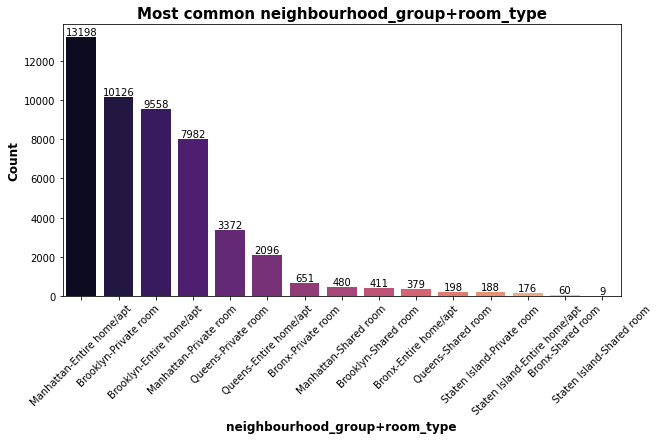

In [17]:
ujj = data.groupby(["neighbourhood_group","room_type"],as_index=False).agg({"name":"count"}).sort_values(by="name",ascending=False)
ujj["together"] = ujj["neighbourhood_group"] + "-" + ujj["room_type"]
plt.figure(figsize=(10,5))
haz = sns.barplot(x="together",y="name",data=ujj,palette="magma")
haz.bar_label(haz.containers[0])
plt.title("Most common neighbourhood_group+room_type", fontsize=15, fontweight="bold")
plt.xlabel("neighbourhood_group+room_type", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

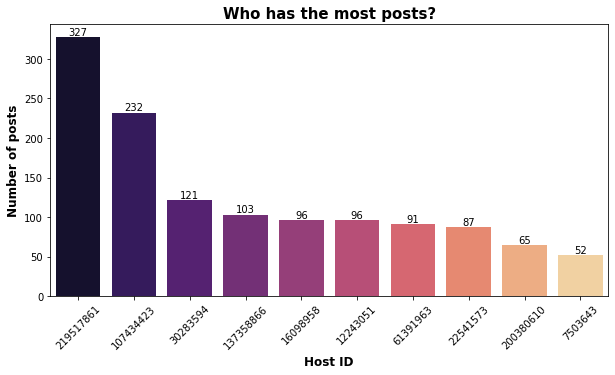

In [18]:
jup = data.groupby("host_id").agg({"name":"count"}).sort_values(by="name", ascending=False).head(10).reset_index()
plt.figure(figsize=(10,5))
haz = sns.barplot(data=jup, x="host_id",y="name", palette="magma", order=jup["host_id"])
haz.bar_label(haz.containers[0])
plt.title("Who has the most posts?", fontsize=15, fontweight="bold")
plt.xlabel("Host ID", fontsize=12, fontweight="bold")
plt.ylabel("Number of posts", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.show()
del jup

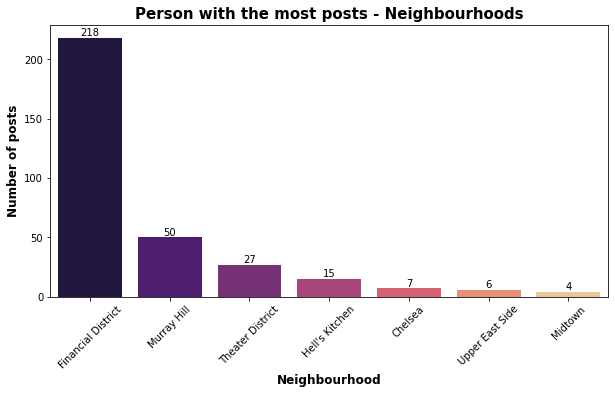

Average price per neighbourhood of the person with the most posts: 
                          price
neighbourhood                 
Theater District    286.777778
Financial District  264.853211
Chelsea             251.571429
Murray Hill         220.100000
Midtown             200.250000
Hell's Kitchen      185.933333
Upper East Side     159.666667


In [19]:
jup1 = data[data["host_id"] == 219517861].groupby("neighbourhood").agg({"name":"count"}).sort_values(by="name", ascending=False).head(10).reset_index()
plt.figure(figsize=(10,5))
haz = sns.countplot(data=data[data["host_id"] == 219517861], x="neighbourhood", palette="magma", order=jup1["neighbourhood"])
haz.bar_label(haz.containers[0])
plt.title("Person with the most posts - Neighbourhoods", fontsize=15, fontweight="bold")
plt.xlabel("Neighbourhood", fontsize=12, fontweight="bold")
plt.ylabel("Number of posts", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.show()  
del jup1
print("Average price per neighbourhood of the person with the most posts:", "\n", data[data["host_id"] == 219517861].groupby("neighbourhood").agg({"price":"mean"}).sort_values(by="price", ascending=False))

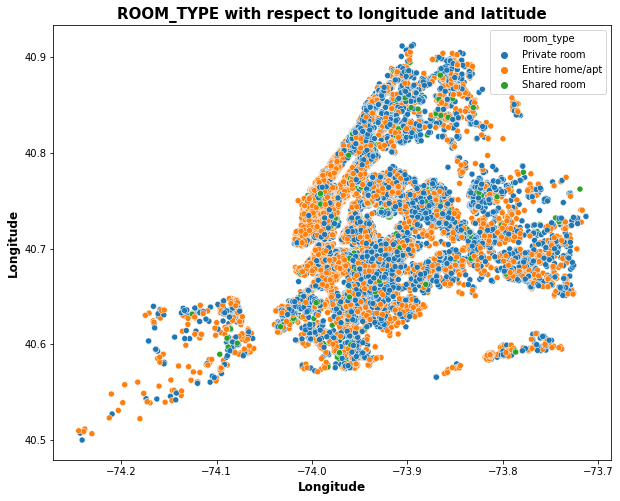

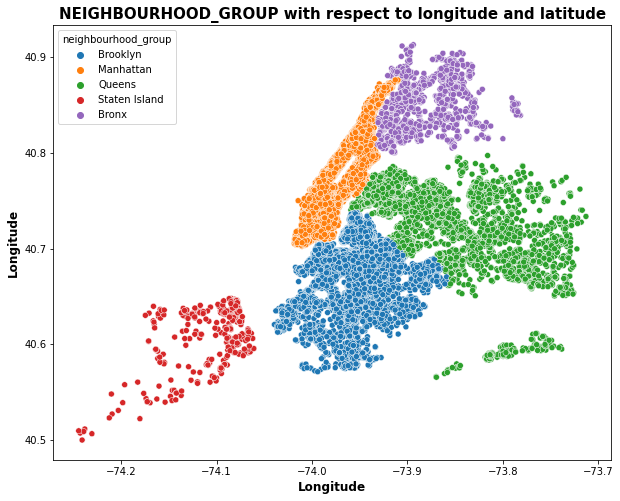

In [20]:
for i in ["room_type","neighbourhood_group"]:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=data,x="longitude",y="latitude", hue=i)
    plt.title("{} with respect to longitude and latitude".format(i.upper()), fontsize=15, fontweight="bold")
    plt.xlabel("Longitude", fontsize=12, fontweight="bold")
    plt.ylabel("Longitude", fontsize=12, fontweight="bold")
    plt.show()

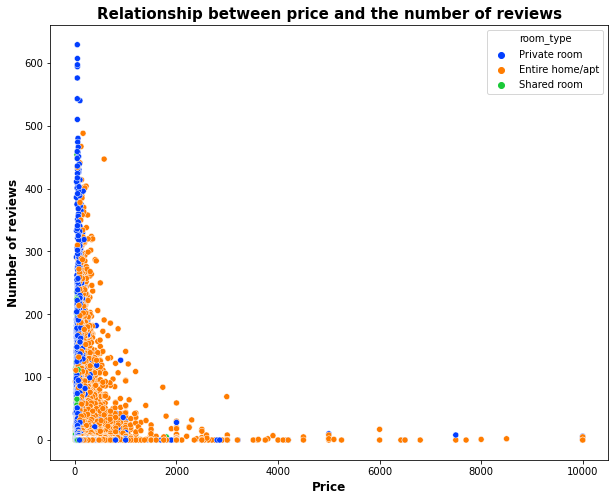

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x="price",y="number_of_reviews", hue="room_type", palette="bright")
plt.title("Relationship between price and the number of reviews", fontsize=15, fontweight="bold")
plt.xlabel("Price", fontsize=12, fontweight="bold")
plt.ylabel("Number of reviews", fontsize=12, fontweight="bold")
plt.show()

In [22]:
print(data["price"].quantile(0.99))
q1 = data["price"].quantile(0.25)
q3 = data["price"].quantile(0.75)
iqr = q3 - q1
low_limit = q1 - (3*iqr)
up_limit = q3 + (3*iqr)
print("Upper outlier {}".format("price"))
print(len(data[data["price"] > up_limit]))
print("Lower outlier {}".format("price"))
print(len(data[data["price"] < low_limit]))
data = data[(data["price"] > low_limit) & (data["price"] < up_limit)]

799.0
Upper outlier price
1328
Lower outlier price
0


# ML Models

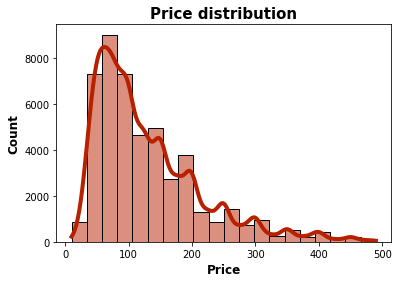

Average price 129.3647068718984


In [23]:
sns.histplot(x="price",data=data, kde=True, color="#B82100", line_kws={"lw":4}, bins=20)
plt.title("Price distribution", fontsize=15, fontweight="bold")
plt.xlabel("Price", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.show()
print("Average price {}".format(data["price"].mean()))

In [24]:
def logtransform(yes):
    if yes == "yes":
        data["price"] = np.log2(data["price"])
        print("You've selected log transformation")

In [25]:
# For log trans - price "yes"
logtransform("yes")

You've selected log transformation


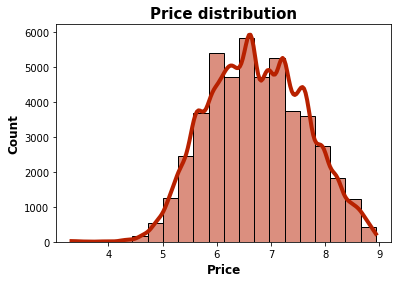

Average price 6.741042343182372


In [26]:
sns.histplot(x="price",data=data, kde=True, color="#B82100", line_kws={"lw":4}, bins=20)
plt.title("Price distribution", fontsize=15, fontweight="bold")
plt.xlabel("Price", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.show()
print("Average price {}".format(data["price"].mean()))

In [27]:
data.drop(columns=["name","host_id"],inplace=True)
for i in data.select_dtypes(include="object").columns:
    data[i] = data[i].astype("category")
    data[i] = data[i].cat.codes
for i in ["neighbourhood_group","room_type"]:
    print(i)
    print(data[i].value_counts())
data.head()

neighbourhood_group
2    20680
1    19800
3     5628
0     1081
4      367
Name: neighbourhood_group, dtype: int64
room_type
0    24268
1    22141
2     1147
Name: room_type, dtype: int64


,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4903,1,107,40.64749,-73.97237,1,7.219169,1,9,1495,0.21,6,365
1,4700,2,126,40.75362,-73.98377,0,7.813781,1,45,1709,0.38,2,355
2,2860,2,93,40.80902,-73.94190,1,7.228819,3,0,1758,0.02,1,365
3,6099,1,41,40.68514,-73.95976,0,6.475733,1,270,1754,4.64,1,194
4,5823,2,61,40.79851,-73.94399,0,6.321928,10,9,1526,0.10,1,0


In [28]:
# Splitting the data into X and Y and then testing/training.
from sklearn.model_selection import train_test_split
X = data.drop(columns="price")
y = data["price"]
xTrain, xTest, yTrain, yTest = train_test_split(X,y)

In [29]:
print("Average price - Training dataset = {}".format(yTrain.mean()))
print("Average price - Testing dataset = {}".format(yTest.mean()))

Average price - Training dataset = 6.7397459329557305
Average price - Testing dataset = 6.7449315738622895


In [30]:
# Importing metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import cross_val_score
from math import sqrt

In [31]:
# We will use:
# 1 Linear Regression
# 2 Decision Tree Regression
# 3 Random Forest Regression
# 4 Gradient Boosting Regression
# 5 SVR
# 6 Lasso Regression
# 7 Ridge Regression

# Creating a table for results.
results = pd.DataFrame(columns=["Model","R2Train","R2Test","MAEtrain","MAEtest","MSEtrain","MSEtest", "RMSEtrain","RMSEtest"])

# Defining function for model
def regressionmodel(test):
    test.fit(xTrain,yTrain)
    r2train = r2_score(yTrain, test.predict(xTrain))
    r2test = r2_score(yTest, test.predict(xTest))
    maetrain = mean_absolute_error(yTrain, test.predict(xTrain))
    maetest = mean_absolute_error(yTest, test.predict(xTest))
    msetrain = mean_squared_error(yTrain, test.predict(xTrain))
    msetest = mean_squared_error(yTest, test.predict(xTest))
    rmsetrain = sqrt(mean_squared_error(yTrain, test.predict(xTrain)))
    rmsetest = sqrt(mean_squared_error(yTest, test.predict(xTest)))
    print("R2 Score - Training dataset = {}".format(r2train))
    print("R2 Score - Testing dataset = {}".format(r2test),"\n")
    print("MAE - Training dataset = {}".format(maetrain))
    print("MAE - Testing dataset = {}".format(maetest),"\n")
    print("MSE - Training dataset = {}".format(msetrain))
    print("MSE - Testing dataset = {}".format(msetest),"\n")
    print("RMSE - Training dataset = {}".format(rmsetrain))
    print("RMSE - Testing dataset = {}".format(rmsetest))
    if test == LR:
        results.loc[len(results.index)] = ["LR",r2train,r2test,maetrain,maetest,msetrain,msetest,rmsetrain,rmsetest]
    elif test == DTR:
        results.loc[len(results.index)] = ["DTR",r2train,r2test,maetrain,maetest,msetrain,msetest,rmsetrain,rmsetest]
    elif test == RFR:
        results.loc[len(results.index)] = ["RFR",r2train,r2test,maetrain,maetest,msetrain,msetest,rmsetrain,rmsetest]
    elif test == GBR:
        results.loc[len(results.index)] = ["GBR",r2train,r2test,maetrain,maetest,msetrain,msetest,rmsetrain,rmsetest]
    elif test == LAR:
        results.loc[len(results.index)] = ["LAR",r2train,r2test,maetrain,maetest,msetrain,msetest,rmsetrain,rmsetest]
    elif test == RR:
        results.loc[len(results.index)] = ["RR",r2train,r2test,maetrain,maetest,msetrain,msetest,rmsetrain,rmsetest]
    else:
        results.loc[len(results.index)] = ["Unknown",r2train,r2test,maetrain,maetest,msetrain,msetest,rmsetrain,rmsetest]

def transformization(tran):
    global xTrain, yTrain
    if tran == "stand":
        print("You have selected Standardization.","\n")
        from sklearn.preprocessing import StandardScaler
        xTrain, xTest, yTrain, yTest = train_test_split(X,y)
        scal = StandardScaler()
        xTrain = scal.fit_transform(xTrain)
        xTest = scal.transform(xTest)
        xTrain = pd.DataFrame(xTrain, columns=X.columns)
        xTest = pd.DataFrame(xTest, columns=X.columns)

    elif tran == "norm":
        print("You have selected Normalization.","\n")
        from sklearn.preprocessing import MinMaxScaler
        xTrain, xTest, yTrain, yTest = train_test_split(X,y)
        norm = MinMaxScaler()
        xTrain = norm.fit_transform(xTrain)
        xTest = norm.transform(xTest)
        xTrain = pd.DataFrame(xTrain, columns=X.columns)
        xTest = pd.DataFrame(xTest, columns=X.columns)
        
    else:
        print("You didn't select any type of transformation of features, proceeding with the original dataset.","\n")
    
def crossval(m):
    print("Cross-validation on Training split:")
    for i in ["r2","neg_mean_absolute_error","neg_mean_squared_error"]:
        print(i.upper())
        print(cross_val_score(m, xTrain, yTrain, scoring=i).mean())
    print("\n")

In [32]:
# TRANSFORMATION OF FEATURES
# Standardization - "stand"
# Normalizazion - "norm"
# None - "none"
transformization("none")

You didn't select any type of transformation of features, proceeding with the original dataset. 



In [33]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
crossval(LR)
regressionmodel(LR)

Cross-validation on Training split:
R2
0.5077257448848096
NEG_MEAN_ABSOLUTE_ERROR
-0.48095414199666253
NEG_MEAN_SQUARED_ERROR
-0.39076222854713455


R2 Score - Training dataset = 0.5090180878697648
R2 Score - Testing dataset = 0.510036121635921 

MAE - Training dataset = 0.4806615092889137
MAE - Testing dataset = 0.4857228246314293 

MSE - Training dataset = 0.38982587225427184
MSE - Testing dataset = 0.397298760353131 

RMSE - Training dataset = 0.6243603705027024
RMSE - Testing dataset = 0.6303163970206797


In [34]:
# 1 Linear Regression
# 2 Decision Tree Regression
# 3 Random Forest Regression
# 4 Gradient Boosting Regression
# 5 Lasso Regression
# 6 Ridge Regression

In [35]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
crossval(DTR)
regressionmodel(DTR)

Cross-validation on Training split:
R2
0.2898846121403496
NEG_MEAN_ABSOLUTE_ERROR
-0.5631516690808962
NEG_MEAN_SQUARED_ERROR
-0.5608040628219733


R2 Score - Training dataset = 0.9999955416826709
R2 Score - Testing dataset = 0.3025324749920212 

MAE - Training dataset = 1.4088662924536722e-05
MAE - Testing dataset = 0.5646230483072894 

MSE - Training dataset = 3.5397789585883996e-06
MSE - Testing dataset = 0.5655579835751252 

RMSE - Training dataset = 0.0018814300302132949
RMSE - Testing dataset = 0.7520358924779622


In [36]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
regressionmodel(RFR)

R2 Score - Training dataset = 0.9504995080810081
R2 Score - Testing dataset = 0.6518467360722273 

MAE - Training dataset = 0.14818231018344347
MAE - Testing dataset = 0.4039761119074418 

MSE - Training dataset = 0.03930200270640115
MSE - Testing dataset = 0.2823082808333435 

RMSE - Training dataset = 0.19824732711035764
RMSE - Testing dataset = 0.5313269058059675


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
crossval(GBR)
regressionmodel(GBR)

Cross-validation on Training split:
R2
0.6284138683419418
NEG_MEAN_ABSOLUTE_ERROR
-0.4160324277064003
NEG_MEAN_SQUARED_ERROR
-0.2950109420328284


R2 Score - Training dataset = 0.6380375725306756
R2 Score - Testing dataset = 0.6282357246495069 

MAE - Training dataset = 0.4107728141068725
MAE - Testing dataset = 0.4218866662731723 

MSE - Training dataset = 0.2873880188361704
MSE - Testing dataset = 0.3014538260115942 

RMSE - Training dataset = 0.536085831594317
RMSE - Testing dataset = 0.5490481090137678


In [38]:
from sklearn.linear_model import Lasso
LAR = Lasso()
regressionmodel(LAR)

R2 Score - Training dataset = 0.04167673345142697
R2 Score - Testing dataset = 0.044721562062366105 

MAE - Training dataset = 0.7173637701547512
MAE - Testing dataset = 0.7208470724243988 

MSE - Training dataset = 0.7608818045108898
MSE - Testing dataset = 0.774610039523522 

RMSE - Training dataset = 0.8722853916642705
RMSE - Testing dataset = 0.8801193325473098


In [39]:
from sklearn.linear_model import Ridge
RR = Ridge()
crossval(RR)
regressionmodel(RR)

Cross-validation on Training split:
R2
0.5077184163964974
NEG_MEAN_ABSOLUTE_ERROR
-0.48112348406961136
NEG_MEAN_SQUARED_ERROR
-0.39076964086936317


R2 Score - Training dataset = 0.509006994953461
R2 Score - Testing dataset = 0.5098862863435989 

MAE - Training dataset = 0.48079477635731316
MAE - Testing dataset = 0.48589434427483746 

MSE - Training dataset = 0.3898346797187978
MSE - Testing dataset = 0.3974202578318748 

RMSE - Training dataset = 0.6243674236527702
RMSE - Testing dataset = 0.6304127678211117


# RESULTS

In [40]:
results

,Model,R2Train,R2Test,MAEtrain,MAEtest,MSEtrain,MSEtest,RMSEtrain,RMSEtest
0,LR,0.509018,0.510036,0.480662,0.485723,0.389826,0.397299,0.624360,0.630316
1,DTR,0.999996,0.302532,0.000014,0.564623,0.000004,0.565558,0.001881,0.752036
2,RFR,0.950500,0.651847,0.148182,0.403976,0.039302,0.282308,0.198247,0.531327
3,GBR,0.638038,0.628236,0.410773,0.421887,0.287388,0.301454,0.536086,0.549048
4,LAR,0.041677,0.044722,0.717364,0.720847,0.760882,0.774610,0.872285,0.880119
5,RR,0.509007,0.509886,0.480795,0.485894,0.389835,0.397420,0.624367,0.630413


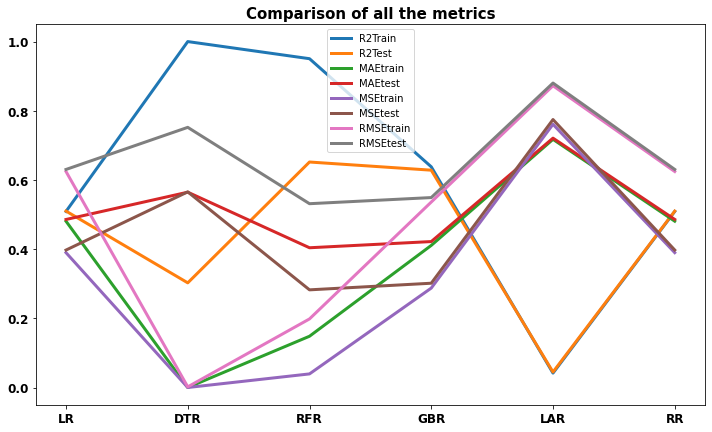

In [41]:
plt.figure(figsize=(12,7))
for i in results.select_dtypes(include="number").columns:
    plt.plot(results["Model"],results[i], label=i, linewidth=3)
    plt.title("Comparison of all the metrics", fontsize=15, fontweight="bold")
    plt.xticks(fontsize=12, fontweight="bold")
    plt.yticks(fontsize=12, fontweight="bold")
    plt.legend()

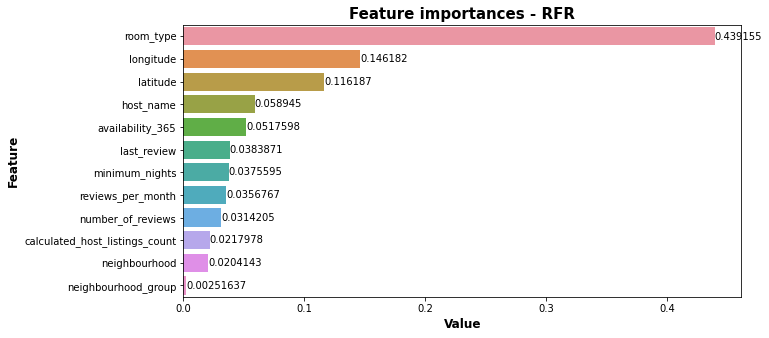

In [42]:
plt.figure(figsize=(10,5))
haz = sns.barplot(x=RFR.feature_importances_,y=RFR.feature_names_in_, order=pd.DataFrame({"Name":RFR.feature_names_in_,"Value":RFR.feature_importances_}).sort_values(by="Value",ascending=False)["Name"])
haz.bar_label(haz.containers[0])
plt.title("Feature importances - RFR", fontsize=15, fontweight="bold")
plt.xlabel("Value",fontsize=12, fontweight="bold")
plt.ylabel("Feature",fontsize=12, fontweight="bold")
plt.show()

In [43]:
#  Parameter tuning - one parameter - max_depth.
# from sklearn.model_selection import GridSearchCV
# RFR2 = RandomForestRegressor()
# param_grid = {'max_depth':list(range(1,20)),"max_features" : ["auto", "sqrt", "log2"],"min_samples_split" : np.linspace(0.1, 1.0, 10)}
# GRDSCV = GridSearchCV(estimator=RFR2, param_grid=param_grid)
# RFR2 = GRDSCV.fit(xTrain,yTrain)

In [44]:
# # We got worse results than with the default settings of parameters.
# print(RFR2.best_params_)
# RFRCV = RFR2.best_estimator_
# regressionmodel(RFRCV)

In [45]:
# # Best performing model
# from sklearn.ensemble import RandomForestRegressor
# RFR = RandomForestRegressor()
# regressionmodel(RFR)

# Merging datasets together

In [46]:
predictedTrain = pd.DataFrame({"Actual":yTrain,"Predicted":RFR.predict(xTrain),"Type":"Seen"})
predictedTest = pd.DataFrame({"Actual":yTest,"Predicted":RFR.predict(xTest),"Type":"Unseen"})
print("Shape of {} is: {}\nNull values in Train:\n{}".format("predictedTrain",predictedTrain.shape, predictedTrain.isna().sum()))
print("Shape of {} is: {}\nNull values in Test:\n{}".format("predictedTest",predictedTest.shape, predictedTest.isna().sum()))
predictedData = pd.concat([predictedTrain,predictedTest])
predictedData["Actual"] = predictedData["Actual"].apply(lambda x: 2**(x))
predictedData["Predicted"] = predictedData["Predicted"].apply(lambda x: 2**(x))
# predictedData["Predicted"] = predictedData["Predicted"].apply(lambda x: 2**(x))
predictedData.head()

Shape of predictedTrain is: (35667, 3)
Null values in Train:
Actual       0
Predicted    0
Type         0
dtype: int64
Shape of predictedTest is: (11889, 3)
Null values in Test:
Actual       0
Predicted    0
Type         0
dtype: int64


,Actual,Predicted,Type
31493,200.0,205.914308,Seen
16752,117.0,125.668153,Seen
44180,164.0,154.236460,Seen
24862,160.0,151.969855,Seen
18907,60.0,63.170846,Seen


In [47]:
merged = pd.merge(left=data1,right=predictedData,left_index=True,right_index=True,how="inner")
print("Shape of dataset is :{}".format(merged.shape))
merged.head()

Shape of dataset is :(47556, 19)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Actual,Predicted,Type
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.0,106.969471,Seen
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.0,226.199167,Seen
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Unknown,0.02,1,365,150.0,131.094025,Seen
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.0,123.982279,Unseen
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,80.0,129.130564,Unseen


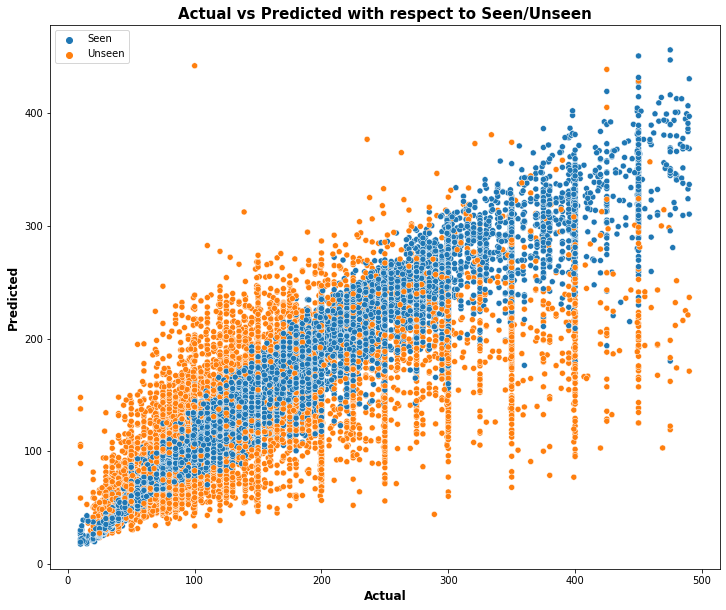

In [57]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Actual",y="Predicted",data=merged,hue="Type")
plt.title("Actual vs Predicted with respect to Seen/Unseen", fontsize=15, fontweight="bold")
plt.xlabel("Actual",fontsize=12, fontweight="bold")
plt.ylabel("Predicted",fontsize=12, fontweight="bold")
plt.legend()
plt.show()

In [49]:
# CONCLUSION
# After trying numerous feature engineering techniques, we could never get close to reliably good metrics of predicted price.
# In conclusion, we can conclude that the features of this dataset are not sufficient for a credible and accurate prediction of the price of the apartment. 
# For a more accurate prediction, we would need features such as: 
# - area of the apartment
# - number of rooms and bathrooms
# - age of the building
# - and many more.
# Features like "last_review", "minimum_nights", "calculated_host_listings_count", "host_name" are not relevant when it comes to predicting a price.
# Interesting fact - Borough is the least important feature of this whole dataset.
